In [31]:
import pandas as pd
data = pd.DataFrame(
        {
            "cells": [10250, 20590, 47971, 48718, 49465, 485, 486, 488],
            "firing rate (spikes/sec)": [0.200025, 0.025003, 0.200025, 0.075009, 2.550319, 3.225403, 1.425178, 1.950244],
            "sorter":["ground_truth", "ground_truth", "ground_truth", "ground_truth", "kilosort3", "kilosort3", "kilosort3", "kilosort3"]
        }
)

In [62]:
outliers_gt = data_gt[(data_gt > whisker_high_gt) | (data_gt < whisker_low_gt)]
outliers_gt
outliers_ks = np.array([7])

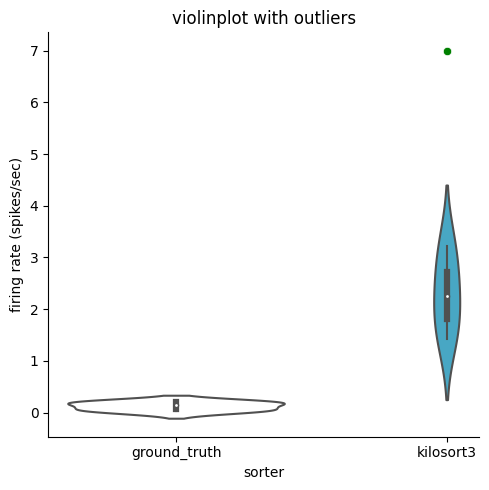

In [64]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
my_colors = {"ground_truth": "w", "kilosort3": [0.2, 0.7, 0.85]}

fig, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
sns.violinplot(data=data, y="firing rate (spikes/sec)", x="sorter", ax=ax3, palette=my_colors)

data_gt = data["firing rate (spikes/sec)"][data["sorter"]=="ground_truth"]
q1_gt, q3_gt = np.percentile(data_gt, [25, 75])
whisker_low_gt = q1_gt - (q3_gt - q1_gt) * 1.5
whisker_high_gt = q3_gt + (q3_gt - q1_gt) * 1.5
outliers_gt = data_gt[(data_gt > whisker_high_gt) | (data_gt < whisker_low_gt)]

# data_ks = data["firing rate (spikes/sec)"][data["sorter"]=="kilosort3"]
# q1_ks, q3_ks = np.percentile(data_ks, [25, 75])
# whisker_low_ks = q1_ks - (q3_ks - q1_ks) * 1.5
# whisker_high_ks = q3_ks + (q3_ks - q1_ks) * 1.5
# outliers_ks = data_ks[(data_ks > whisker_high_ks) | (data_ks < whisker_low_ks)]

sns.scatterplot(y=outliers_gt, x=0, marker='o', color='crimson', ax=ax3)
sns.scatterplot(y=outliers_ks, x=1, marker='o', color='g', ax=ax3)

sns.despine(fig, top=True, left=False, right=True)
ax3.set_title('violinplot with outliers')
plt.tight_layout()
plt.show()


/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/env_silico/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


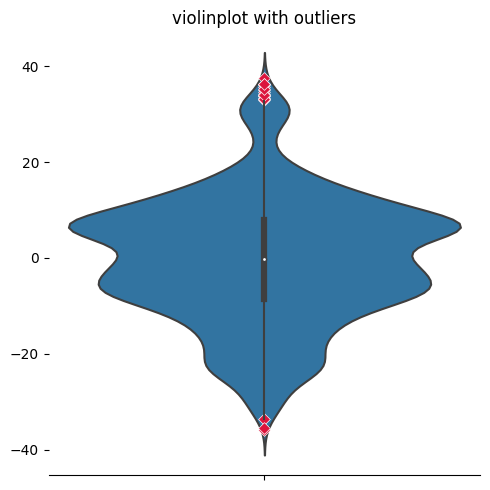

In [24]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(553)
data = np.random.randn(6, 500).cumsum(axis=1).ravel()
q1, q3 = np.percentile(data, [25, 75])
whisker_low = q1 - (q3 - q1) * 1.5
whisker_high = q3 + (q3 - q1) * 1.5

fig, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
sns.violinplot(y=data, ax=ax3, orient="h")
outliers = data[(data > whisker_high) | (data < whisker_low)]
sns.scatterplot(y=outliers, x=0, marker='D', color='crimson', ax=ax3)
# plt.setp(ax3, "xticks", [])
sns.despine(fig, top=True, left=True, right=True)
ax3.set_title('violinplot with outliers')
plt.tight_layout()
plt.show()
